Import Libraries :

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Convert to HSV, Range for brown color,Mask the brown color, Extract the brown color, Increase the saturation and brightness, enchanced brown image :

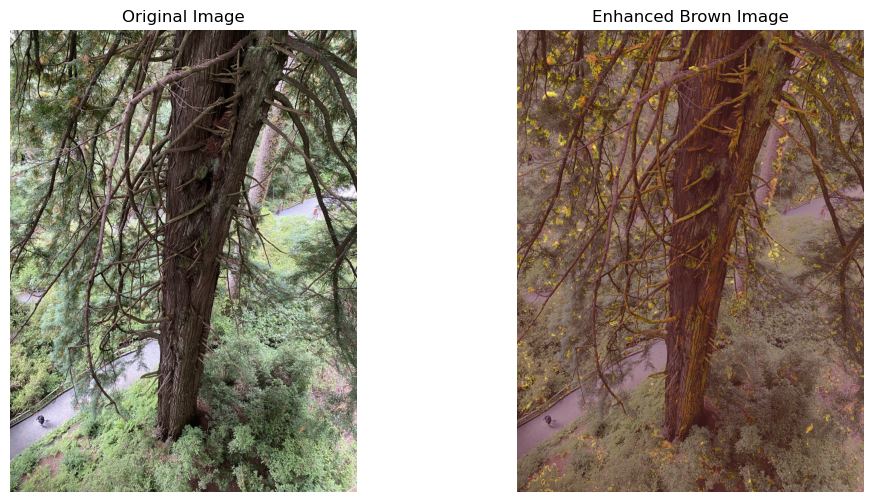

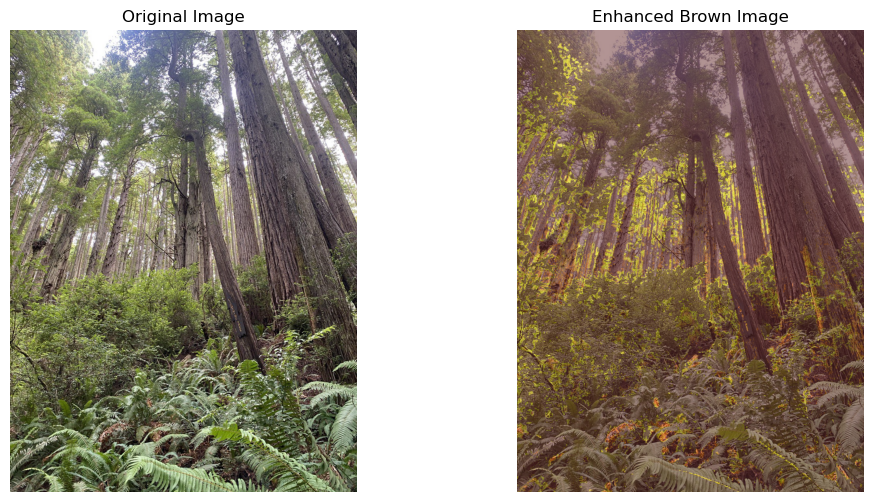

In [5]:
def enhance_brown_in_forest(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the range for brown color (you can tweak the values as needed)
    lower_brown = np.array([10, 50, 50])
    upper_brown = np.array([30, 255, 255])

    # Create a mask for the brown color
    brown_mask = cv2.inRange(hsv_image, lower_brown, upper_brown)

    # Extract the brown areas from the original image
    brown_area = cv2.bitwise_and(hsv_image, hsv_image, mask=brown_mask)

    # Increase the saturation and brightness of the brown areas
    hue, saturation, value = cv2.split(brown_area)
    saturation = cv2.add(saturation, 150)  # Increase saturation by 150 for more vivid colors
    value = cv2.add(value, 100)  # Increase brightness by 100 for a brighter effect

    # Merge the channels back
    enhanced_brown = cv2.merge([hue, saturation, value])

    # Convert back to BGR color space
    enhanced_image = cv2.cvtColor(enhanced_brown, cv2.COLOR_HSV2BGR)

    # Blend the enhanced brown with the original image more aggressively
    final_image = cv2.addWeighted(image, 0.5, enhanced_image, 0.5, 0)  # Adjust blend ratio for more brown impact

    # Convert the images to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    final_image_rgb = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)

    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Show the original image
    ax[0].imshow(image_rgb)
    ax[0].axis('off')
    ax[0].set_title('Original Image')

    # Show the enhanced image
    ax[1].imshow(final_image_rgb)
    ax[1].axis('off')
    ax[1].set_title('Enhanced Brown Image')

    # Display the images
    plt.show()

# Specify the paths for your images
image_path1 = r'C:\vishnu\image\image_gr1.jpg'
image_path2 = r'C:\vishnu\image\image_gr2.jpg'

# Enhance and show the brown color in both images
enhance_brown_in_forest(image_path1)
enhance_brown_in_forest(image_path2)
